# K-Means Clustering

In this notebook, we will be implementing K-Means Clustering algorithm from scratch.

**Clustering** is an **unsupervised learning** task where training examples are grouped into a cluster based on their **similarity**.
- Note that the **similarity** is based on a **similarity** or a **distance measure**.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs

K-Means algorithm is used or clustering and hence it is an unsupervised ML algorithm.
- The K-Means algorithm is an **iterative** clustering algorithm of moving the centers of the clusters, called the centroids, to the mean position o their constituent instances and re-assigning instances to the clusters with the closest centroids.
- $k$ is a hyperparameter that is the no of clustrs that the algorithm should find.
- This process is stopped when all data points are assigned to stable clusters or maximum no. of iterations is reached.

**Input:**
- $n$ training examples represented with $m$ features
- No. of centroids: $k$

# Generating synthetic data

In [2]:
cluster_count = 3

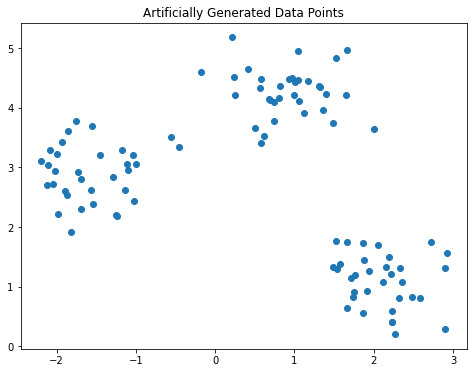

In [3]:
from sklearn.datasets._samples_generator import make_blobs

X,y_true = make_blobs(
    n_samples=100,
    n_features=2,
    centers=cluster_count,
    cluster_std=0.45,
    random_state=0
)

# visualizing the dataset
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1])
plt.title("Artificially Generated Data Points")
plt.show()

In [5]:
print(X.shape,y_true.shape)

(100, 2) (100,)


# Algorithm

1. Randomly initialize $k$ centroids. Note that each centroid is a vector in $m$ dimensional space.
2. Repeat untill convergence:
    - Assign points to the closest centroids.
    - Calculate the centroids based on the points assigned to the cluster.
3. The algorithm converges when the centroid stops changing or in other words the cluster membership stabilizes and subsequent iterations do not yield any changes.

In [6]:
def fit(X,k,max_iterations=10):
    # take 'k' random points from the data set and take them as initial centroids
    centroids = X[np.random.randint(0,X.shape[0],size=k)]

    # calculate initial label of each data point
    labels = np.argmin(cdist(X,centroids), axis=1)

    for _ in range(max_iterations):
        # copy labels for all points for comparing later
        previous_labels = labels.copy()

        # compute new centroids
        centroids = np.array([np.mean(X[labels==r], axis=0) for r in range(k)])

        # lastly recalculate labels of each datapoint
        labels= np.argmin(cdist(X,centroids), axis=1)

        # check if labels of points are not changing
        if all(labels==previous_labels):
            break
    
    return centroids, labels

Let's train our model on the dataset.

In [7]:
centroids, labels = fit(X, cluster_count)

In [8]:
print("Centroids:\n", centroids)

Centroids:
 [[ 0.9208711   4.27011276]
 [ 2.09309379  1.10200909]
 [-1.55313674  2.90386397]]


Let's visualize the cluster centers as obtained through k-means clustering algorithm.

In [9]:
def plot_kmeans(X, centroids, labels, rseed=0, ax=None):
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')

    # plot data points
    ax.scatter(X[:,0],X[:,1], c=labels, s=40, cmap='plasma')

    # plot representation of the KMeans model
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centroids)]
    for c, r in zip(centroids, radii):
        # add circular shapes to the cluster
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=5, alpha=0.5))
    
    plt.show()

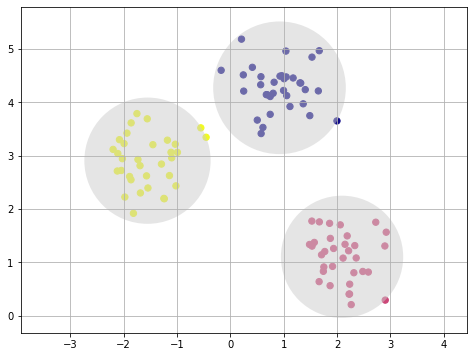

In [10]:
plt.figure(figsize=(8,6))
plt.grid(True)
plot_kmeans(X, centroids, labels)

If we don't know $k$ beforehand, we can use the following $2$ methods ---
- **Elbow method**
- **Silhoutte method**